## Importing Libraries

In [49]:
import pandas as pd
import emoji

import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

import nltk
from nltk.tokenize import word_tokenize


In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, GRU, BatchNormalization
from keras.utils import to_categorical

In [51]:
# nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

## Importing Dataset with 200000 rows

In [3]:
# df = pd.read_csv("Urdu Tweets Dataset.csv").sample(n=200000, random_state=1)

In [4]:
# df = pd.read_csv("Urdu Tweets Dataset.csv")

In [5]:
# df.shape


In [6]:
# df = td.sample(n=200000, random_state=1)

In [8]:
# df.to_csv('Tweets.csv', index=False)

## Importing Saved Dataset

In [9]:
df = pd.read_csv("Tweets.csv")

## Data Preprocessing

In [10]:
df.isnull().sum()

Id              0
Text            0
Emotions        0
Category    98201
dtype: int64

In [11]:

df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Id          0
Text        0
Emotions    0
Category    0
dtype: int64

In [13]:
df.shape

(101799, 4)

In [14]:
df.drop(columns=['Id', 'Emotions'],inplace=True)

In [15]:
df.head(2)

,Text,Category
1,~*ْﮩﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮫﮩہ۽௸🏌🏻♂😹♥ֆ *~⠉̮⃝✌,Joy
3,آپ کی شادی کب ہے اور کیا گیارہ گیارہ سے ہے؟😂,Joy


## Categorizing sentiments

In [16]:
def categorize_sentiment(emotion):
    positive_emotions = ["joy", "surprise"]  # List of positive emotions (lowercase for uniformity)
    negative_emotions = ["sad", "angry", "disgust", "fear"]  # List of negative emotions (lowercase)

    # Normalize input to a list of emotions for consistent handling
    if isinstance(emotion, str):
        # Remove brackets, quotes, and extra spaces, then split into a list
        emotion_list = [e.strip().lower() for e in emotion.replace('[', '').replace(']', '').replace("'", '').split(',')]
    elif isinstance(emotion, list):
        # Convert list items to lowercase
        emotion_list = [e.strip().lower() for e in emotion]
    else:
        emotion_list = []

    # Check for presence of positive or negative emotions
    has_positive = any(e in positive_emotions for e in emotion_list)
    has_negative = any(e in negative_emotions for e in emotion_list)

    # Determine sentiment based on the presence of emotions
    if has_positive and not has_negative:
        return "good"
    elif has_negative and not has_positive:
        return "bad"
    elif has_positive and has_negative:
        return "mixed"
#     else:
#         return "neutral"


In [17]:
df['Values'] = df['Category'].apply(categorize_sentiment)

In [18]:
df['Values'].value_counts()

Values
good     85908
bad      13687
mixed     1895
Name: count, dtype: int64

In [19]:
df.sample(10)

,Text,Category,Values
90958,لڑکیوں کیطرح ڈی ایم چھپایا ہوا ہے، مغل صاحب خی...,"Joy , Joy",good
23775,افسوس ہم پاکستانی قوم آزادی کے 70 سال بعد بھی ...,Sad,bad
67566,باباجی کہتے ہیں انسان کی آدھی خوبصورتی اس کی ز...,['Sad'],bad
176909,بجا فرمایا عوامی مافیا بھی جو سابقہ چور حکمران...,['Joy'],good
142252,ذرائع کے مطابق یہ سن کر شہبازشریف غش کھا کر گر...,Joy,good
7190,ہاؤ اسٹرونگ یو آر😍👌,Joy,good
162996,پریشانیوں 🤯کو ایسے ہی نظر انداز کرو 😇 جیسے .....,Joy,good
47925,تجھے پانے کےبعد اور کچھ نہ مانگو❤ خدا جانتا ہ...,Joy,good
89520,مفت کے ہیں جو اٹھا کر لے جائیں گے کراچی کی طرف...,['Joy'],good
114150,حالانکہ غالب اتنے اچھے شاعر تھے 😜😜😜,['Joy'],good


In [20]:
emotions_to_remove = ['mixed', 'neutral']
df = df[~df["Values"].isin(emotions_to_remove)]

In [21]:
df['Values'].value_counts()

Values
good    85908
bad     13687
Name: count, dtype: int64

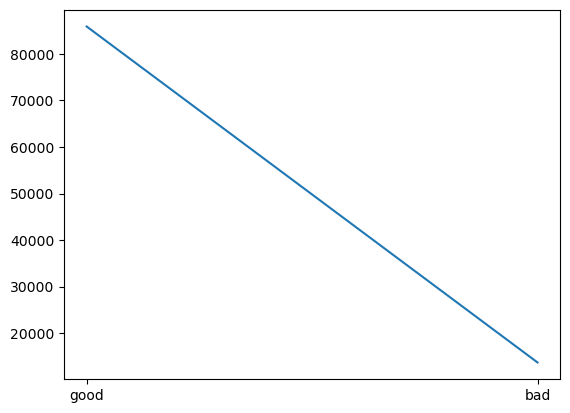

In [22]:
plt.plot(df['Values'].value_counts())

In [52]:
good = df[df['Values'] == 'good'].sample(20000, random_state=1)
mixed = df[df['Values'] == 'mixed']
neutral = df[df['Values'] == 'neutral']
bad = df[df['Values'] == 'bad']




In [53]:
good.shape, bad.shape, mixed.shape, neutral.shape

((20000, 3), (13687, 3), (0, 3), (0, 3))

## Data Balancing

In [54]:
from sklearn.utils import resample

# Upsample 'mixed', 'bad', and 'neutral' to match the 'good' class size
# mixed_upsampled = resample(mixed, replace=True, n_samples=len(good), random_state=1)
bad_upsampled = resample(bad, replace=True, n_samples=len(good), random_state=1)
# neutral_upsampled = resample(neutral, replace=True, n_samples=len(good), random_state=1)



In [55]:
# Combine the oversampled data with the 'good' class
# balanced_df = pd.concat([good, mixed_upsampled, bad_upsampled, neutral_upsampled])
balanced_df = pd.concat([good, bad_upsampled, ])

# Shuffle the dataset to ensure randomness
balanced_df = balanced_df.sample(frac=1, random_state=1).reset_index(drop=True)


In [56]:
balanced_df.shape

(40000, 3)

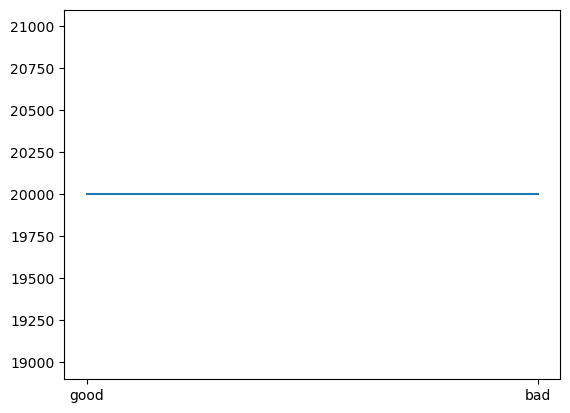

In [57]:
plt.plot(balanced_df['Values'].value_counts())

# Lemmetization

In [58]:
# !pip install urduhack


In [59]:
from LughaatNLP import LughaatNLP, POS_urdu, NER_Urdu, TextSummarization, UrduSpeech
# For Normalization, Lemmetization/Stemming, Stopwords Removing and Spell CEking
from LughaatNLP import NER_Urdu
from LughaatNLP import POS_urdu
from LughaatNLP import LughaatNLP
urdu_text_processing = LughaatNLP()




# # For Part of Speech
# pos_tagger = POS_urdu()

# # For Name Entity Relation
# ner_urdu = NER_Urdu()


In [60]:
from LughaatNLP import LughaatNLP
from LughaatNLP import POS_urdu, NER_Urdu

# Initialize the NLP tools
urdu_normalizer = LughaatNLP()
# ner_urdu = NER_Urdu()
# pos_tagger = POS_urdu()

def preprocess_text(text):
    # Normalize the text
    normalized_text = urdu_normalizer.normalize(text)
    
    # Tokenize the text
    tokens = urdu_normalizer.urdu_tokenize(normalized_text)
    
    # Remove stopwords
    urdu_stopwords = urdu_normalizer.remove_stopwords(text)  # Ensure you have the stopwords loaded
    filtered_tokens = [word for word in tokens if word not in urdu_stopwords]

    # Lemmatize the tokens
    lemmatized_tokens = [urdu_normalizer.lemmatize_sentence(word) for word in filtered_tokens]
    print(lemmatized_tokens)
    
    
    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text


In [61]:
urdu_normalizer.normalize("زندگی بہت خوبصورت ہے، ہر لمحہ قیمتی ہے")


'زندگی بہت خوبصورت ہے، ہر لمحہ قیمتی ہے'

In [62]:
urdu_normalizer.urdu_tokenize("زندگی بہت خوبصورت ہے، ہر لمحہ قیمتی ہے")

['زندگی', 'بہت', 'خوبصورت', 'ہے،', 'ہر', 'لمحہ', 'قیمتی', 'ہے']

In [63]:
words= urdu_normalizer.remove_stopwords("زندگی بہت خوبصورت ہے، ہر لمحہ قیمتی ہے")

In [64]:
 # Lemmatize the tokens
for word in words:
    urdu_normalizer.lemmatize_sentence(word)
    print(word)

ز
ن
د
گ
ی
 
خ
و
ب
ص
و
ر
ت
 
ہ
ے
،
 
ل
م
ح
ہ
 
ق
ی
م
ت
ی


In [65]:
urdu_stopwords = [
    'اور', 'کی', 'ہے', 'کا', 'یہ', 'تھا', 'میں', 'نے', 'تھی', 'ہو', 'کہ', 
    'پر', 'جب', 'جو', 'کے', 'ایک', 'ان', 'یا', 'تک', 'لیکن', 'یہاں', 'تھی',
    'وہ', 'سب', 'کچھ', 'جو', 'ہم', 'نہیں', 'یہ', 'تھا', 'توں', 'آپ', 
    'انکی', 'اسی', 'اگر', 'ہاں', 'آج', 'بھی', 'کہاں', 'تھوڑا', 'اور', 
    'ہمارا', 'تم', 'تھا', 'ہو', 'کبھی', 'اس', 'اسکی', 'میرا', 'میری',
    'کیا', 'جبکہ', 'اسکے', 'اسکا', 'لیے', 'پر', 'تھا', 'پہ', 'تھے',
    'ہونا', 'ہونا', 'ہوگا', 'ہوئی', 'ہوتا', 'ہوئی', 'ہوتی', 'ہوں',
    'انکا', 'انکے', 'آنے', 'کی', 'پھر', 'ان', 'تھیں', 'آتا', 'آتی',
    'آئے', 'کچھ', 'بس', 'ہے', 'سے', 'لیکن', 'علاوہ', 'تاہم', 
    'یہی', 'وہی', 'اسی', 'یہاں', 'کہیں', 'کبھی', 'خود', 'کسی', 
    'نہ', 'کون', 'ہوتا', 'ہوتی', 'آج', 'نہیں', 'یہ', 'کیا', 'بس'
]


In [66]:
urdu_normalizer = LughaatNLP()

In [67]:
def preprocess_text(text):
    
    # text in lowercase
    text = text.lower()

    
    # Keep emojis and remove other special characters and punctuation
    text = ''.join(c for c in text if c.isalnum() or c in emoji.EMOJI_DATA or c.isspace())

    # Remove punctuation and special characters
    # text = re.sub(r'[^\w\s]', '', text)
    
    # tokenization
    words = word_tokenize(text)
#     print(words[:10])
    
    # Remove stopwords 
    words = [word for word in words if word not in urdu_stopwords]
    
    lemmatized_tokens = [urdu_normalizer.lemmatize_sentence(word) for word in words]
#     print(lemmatized_tokens)
    
    
    #     join the tokens in string again    
    return ' '.join(lemmatized_tokens)

    
    
    

In [68]:
from LughaatNLP import LughaatNLP

urdu_text_processing = LughaatNLP()
print(dir(urdu_text_processing))


['COMBINE_URDU_CHARACTERS', 'CORRECT_URDU_CHARACTERS_MAPPING', 'ENG_URDU_DIGITS_MAP', 'REMOVE_SPACE_BEFORE_PUNCTUATIONS_RE', 'SPACE_AFTER_PUNCTUATIONS_RE', 'URDU_ENG_DIGITS_MAP', 'URDU_PUNCTUATIONS', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'all_words', 'corrected_sentence_spelling', 'get_similar_words', 'get_similar_words_percentage', 'just_urdu', 'lemmatization_dict', 'lemmatize_sentence', 'logger', 'most_similar_word', 'normalize', 'normalize_characters', 'normalize_combine_characters', 'preserve_special_characters', 'punctuations_space', 'pure_urdu', 'remove_diacritics', 'remove_english', 'remove_numbers', 'remove_numbers_english', 'remove_numbers_urdu', 'remove_special_characters', '

In [69]:
balanced_df['Cleaned_text'] = balanced_df['Text'].apply(preprocess_text)

In [70]:
balanced_df.head()

,Text,Category,Values,Cleaned_text
0,دونوں۔۔😍,Joy,good,دونوں😍
1,مگر اک ملاقات توضروری ہے صنم😉 محمد زبیر کا آرم...,Joy,good,مگر اک ملاقات توضروری صنم😉 محمد زبیر آرمی چیف ...
2,ایک تاریک رات کو ایک ماں اور ایک باپ کا ملاپ ہ...,['Joy'],good,تاریک رات کو ماں باپ ملاپ رات ماں باپ بچہ کو ج...
3,آج شمالی وزیرستان میں ناہیدہ گل جو ہیلتھ کیئر ...,Sad,bad,شمالی وزیرستان ناہیدہ گل ہیلتھ کیئر ورکر کو سر...
4,کیا ذو معنویت ہے سبحان اللہ 😜😊,Joy,good,ذو معنویت سبحان اللہ 😜😊


In [71]:
balanced_df['Values'].value_counts()

Values
good    20000
bad     20000
Name: count, dtype: int64

In [72]:
balanced_df.head()

,Text,Category,Values,Cleaned_text
0,دونوں۔۔😍,Joy,good,دونوں😍
1,مگر اک ملاقات توضروری ہے صنم😉 محمد زبیر کا آرم...,Joy,good,مگر اک ملاقات توضروری صنم😉 محمد زبیر آرمی چیف ...
2,ایک تاریک رات کو ایک ماں اور ایک باپ کا ملاپ ہ...,['Joy'],good,تاریک رات کو ماں باپ ملاپ رات ماں باپ بچہ کو ج...
3,آج شمالی وزیرستان میں ناہیدہ گل جو ہیلتھ کیئر ...,Sad,bad,شمالی وزیرستان ناہیدہ گل ہیلتھ کیئر ورکر کو سر...
4,کیا ذو معنویت ہے سبحان اللہ 😜😊,Joy,good,ذو معنویت سبحان اللہ 😜😊


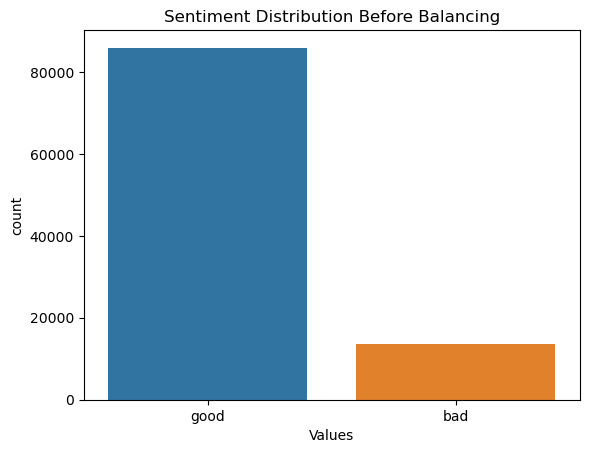

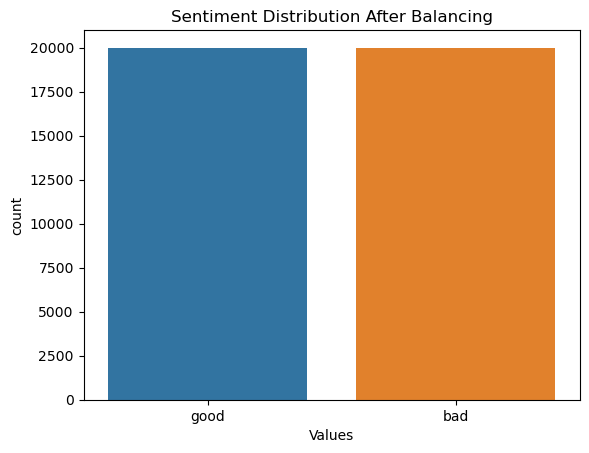

In [73]:
import seaborn as sns

# Before balancing
sns.countplot(x='Values', data=df)
plt.title('Sentiment Distribution Before Balancing')
plt.show()

# After balancing
sns.countplot(x='Values', data=balanced_df)
plt.title('Sentiment Distribution After Balancing')
plt.show()


# Encoding target col

In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [75]:
balanced_df['Values'] = le.fit_transform(balanced_df['Values'])

In [76]:
balanced_df['Values']

0        1
1        1
2        1
3        0
4        1
        ..
39995    1
39996    0
39997    1
39998    1
39999    0
Name: Values, Length: 40000, dtype: int32

# Splitting

In [77]:
x = balanced_df['Cleaned_text']
y = balanced_df['Values']

In [78]:
y.value_counts()

Values
1    20000
0    20000
Name: count, dtype: int64

In [79]:
balanced_df

,Text,Category,Values,Cleaned_text
0,دونوں۔۔😍,Joy,1,دونوں😍
1,مگر اک ملاقات توضروری ہے صنم😉 محمد زبیر کا آرم...,Joy,1,مگر اک ملاقات توضروری صنم😉 محمد زبیر آرمی چیف ...
2,ایک تاریک رات کو ایک ماں اور ایک باپ کا ملاپ ہ...,['Joy'],1,تاریک رات کو ماں باپ ملاپ رات ماں باپ بچہ کو ج...
3,آج شمالی وزیرستان میں ناہیدہ گل جو ہیلتھ کیئر ...,Sad,0,شمالی وزیرستان ناہیدہ گل ہیلتھ کیئر ورکر کو سر...
4,کیا ذو معنویت ہے سبحان اللہ 😜😊,Joy,1,ذو معنویت سبحان اللہ 😜😊
...,...,...,...,...
39995,شکریہ سلامتی ہو😂😂😘,Joy,1,شکریہ سلامتی ہو😂😂😘
39996,*Very impoant message* 😭😭😭😭😭 *تنظیم سازی* کرتے...,Sad,0,very impoant message 😭😭😭😭😭 تنظیم سازی کرنا وقت...
39997,*اُستاد ناچنے اور کاٹنے میں کیا فرق ھے؟ *شاگرد...,['Joy'],1,استاد ناچنا کاٹنا فرق ھے شاگرد تقریر ذکر کرہ ت...
39998,کاش آپ نے بھتہ مافیا اور ٹارگٹ کلرز، چائنا کٹن...,Joy,1,کاش بھتہ مافیا ٹارگٹ کلرز چائنا کٹنگ والا ایسا...


In [80]:

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [81]:
x_train.shape, y_train.shape

((32000,), (32000,))


# Machine Learning

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Feature extraction using TF-IDF and outputting a sparse matrix
vectorizer = TfidfVectorizer(max_features=12000)
X_train_vectorized = vectorizer.fit_transform(x_train)
X_test_vectorized = vectorizer.transform(x_test)

# Check the shape of the resulting vectors
print("Shape of training TF-IDF vectors:", X_train_vectorized.shape)
print("Shape of test TF-IDF vectors:", X_test_vectorized.shape)



Shape of training TF-IDF vectors: (32000, 12000)
Shape of test TF-IDF vectors: (8000, 12000)


In [108]:
X_train_vectorized

<32000x12000 sparse matrix of type '<class 'numpy.float64'>'
	with 285019 stored elements in Compressed Sparse Row format>

## Smote

In [109]:
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


## GridSearchCV

In [110]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth': [None, 10, 20, 30],
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# print(f"Best parameters: {grid_search.best_params_}")


## Trainig Model (Random Forest)

In [111]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_vectorized, y_train)


RandomForestClassifier(random_state=42)

In [112]:
# Make predictions
y_pred = model.predict(X_test_vectorized)

In [113]:

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.82775
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3999
           1       0.84      0.81      0.82      4001

    accuracy                           0.83      8000
   macro avg       0.83      0.83      0.83      8000
weighted avg       0.83      0.83      0.83      8000



## Testing By Giving New Tweets

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample test tweets
test_tweets = [
    "یہ دن بہت خوبصورت ہے",           # Good (positive)
    "آج کا دن برا تھا",                 # Bad (negative)
    "یہ صورتحال کافی عجیب ہے",         # Neutral
    "مجھے اس بات پر حیرت ہے",            # Mixed
    "یہ ایک مشکل وقت ہے" ,              # Bad (negative)
    "زندگی بہت خوبصورت ہے، ہر لمحہ قیمتی ہے 😍", # Good
    "مجھے اس صورتحال سے شدید خوف محسوس ہو رہا ہے 😨", # Fear
    "یہ دن بہت برا گزر رہا ہے، سب کچھ خراب ہو گیا 😔", # Bad
    "یہ جیت بہت زبردست تھی، مجھے خوشی ہے کہ ہم جیتے 🎉", # Good
    "ان لوگوں کا رویہ بہت برا ہے، میں ان سے تنگ ہوں 😡", # Bad
    "مجھے یقین نہیں آ رہا کہ یہ کیسے ممکن ہو سکتا ہے 🤔", # Good
]

# Preprocess function for test tweets (uses same preprocessing logic as training)
def preprocess_test_tweets(text):
    text = text.lower()  # Convert text to lowercase
    text = ''.join(c for c in text if c.isalnum() or c in emoji.EMOJI_DATA or c.isspace())  # Keep only alphanumeric and emojis
    words = word_tokenize(text)  # Tokenize the text
    words = [word for word in words if word not in urdu_stopwords]  # Remove stopwords
    return ' '.join(words)  # Rejoin the words

# Preprocess test tweets
cleaned_test_tweets = [preprocess_test_tweets(tweet) for tweet in test_tweets]

# Convert test tweets to TF-IDF features using the same vectorizer
X_test_tweets = vectorizer.transform(cleaned_test_tweets).toarray()

# Predict the sentiment for test tweets
y_pred_tweets = model.predict(X_test_tweets)

# Display the predictions
for i, tweet in enumerate(test_tweets):
    sentiment = "Good" if y_pred_tweets[i] == 1 else "Bad"
    print(f"Tweet: {tweet}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 50)



Tweet: یہ دن بہت خوبصورت ہے
Predicted Sentiment: Good
--------------------------------------------------
Tweet: آج کا دن برا تھا
Predicted Sentiment: Bad
--------------------------------------------------
Tweet: یہ صورتحال کافی عجیب ہے
Predicted Sentiment: Good
--------------------------------------------------
Tweet: مجھے اس بات پر حیرت ہے
Predicted Sentiment: Bad
--------------------------------------------------
Tweet: یہ ایک مشکل وقت ہے
Predicted Sentiment: Bad
--------------------------------------------------
Tweet: زندگی بہت خوبصورت ہے، ہر لمحہ قیمتی ہے 😍
Predicted Sentiment: Bad
--------------------------------------------------
Tweet: مجھے اس صورتحال سے شدید خوف محسوس ہو رہا ہے 😨
Predicted Sentiment: Bad
--------------------------------------------------
Tweet: یہ دن بہت برا گزر رہا ہے، سب کچھ خراب ہو گیا 😔
Predicted Sentiment: Bad
--------------------------------------------------
Tweet: یہ جیت بہت زبردست تھی، مجھے خوشی ہے کہ ہم جیتے 🎉
Predicted Sentiment: Good
--------------